<img src='../img/dust_banner.png' alt='Training school and workshop on dust' align='center' width='100%'></img>

<br>

# 01 - Practical exercise - Solution - Satellite I

### About

> In March 2022, a continental-wide plume of Saharan dust extended across the Mediterranean Sea up as far as northern Europe. The dust outbreak lasted for a week from 15 to 22 March. According to [EUMETSAT](https://www.eumetsat.int/), "Saharan dust has several impacts in the populated areas of Europe — from flight security to air quality and impacts on solar radiation. There were reports of red skies, the effect of dust dimming radiation, and dust deposits across Europe, including on snow in the Alps, associated with record concentrations of atmospheric aerosol measured by the Spanish air quality network." ([Source](https://www.eumetsat.int/widespread-dust-intrusion-across-europe))

> You are an analyst working for the [Spanish Aviation Safety and Security Agency](https://www.seguridadaerea.gob.es/), also known by the acronym AESA (Spanish: Agencia Estatal de Seguridad Aérea). You are responsible for monitoring the development of this dust event. **Your supervisor asked you to use satellite data to illustrate the impact of this event over continental Spain (excluding Canary Islands) on 15 March 2022 between 12:30 and 13:15 UTC.**


### Tasks

#### 1. Brainstorm
  * What satellite data have you learned about? 
  * What is the difference between Level 1 and Level 2 data?
  
#### 2. Download the Suomi NPP VIIRS Level 1B data and visualize the natural colour RGB composite
  * Based on data availability - which time stamp would you choose for getting a near real-time monitoring of dust from the Suomi NPP VIIRS instrument?
  * **Hint**
    * [Suomi NPP VIIRS Level 1B - Example notebook](../04_data_workflows/41_satellite_observations/413_VIIRS_L1B_RGB_load_browse.ipynb)
    * [Data access](https://ladsweb.modaps.eosdis.nasa.gov/search/order/2/VNP02DNB--5200,VNP02IMG--5200,VNP02MOD--5200,VNP03DNB--5200,VNP03IMG--5200,VNP03MOD--5200)
    * You can use [this website](http://bboxfinder.com/#0.000000,0.000000,0.000000,0.000000) to find the bounding box or latitude and longitude coordinates for Spain.

#### 3. Download the MSG SEVIRI Level 1.5 data and visualize the Dust RGB composite
  * Based on data availability - which time stamp would you choose for getting a near real-time monitoring of dust from the MSG SEVIRI instrument?
  * **Hint**
    * [MSG SEVIRI Level 1.5 - Example notebook](../04_data_workflows/41_satellite_observations/411_MSG_dust_product_L1_load_browse.ipynb)
    * [Data access](https://data.eumetsat.int/data/map/EO:EUM:DAT:MSG:HRSEVIRI)

#### 4. Download the Sentinel-5P TROPOMI Level 2 Aerosol Index data and visualize it
  * Based on data availability - which time stamp would you choose for getting a near real-time monitoring of dust from the Sentinel-5P TROPOMI instrument?
  * **Hint**
    * [Sentinel-5P TROPOMI Level 2 Aerosol Index - Example notebook](../04_data_workflows/41_satellite_observations/415_Sentinel-5P_TROPOMI_AI_L2_load_browse.ipynb)
    * [Data access](https://s5phub.copernicus.eu/dhus/#/home)

#### 5. Interpret the results
  * Compare the map using Sentinel-5P TROPOMI UVAI data with your RGB composites. 
  * Why is it important to use multiple sources of satellite data for the same event? 

### Module outline
* [1 - Suomi NPP VIIRS Level 1B natural colour RGB](#viirs)
* [2 - Meteosat Second Generation SEVIRI Level 1.5 dust RGB](#msg_seviri)
* [3 - Sentinel-5P TROPOMI Level 2 Aerosol Index](#s5p_ai)

<hr>

##### Load required libraries

In [1]:
import glob
import numpy as np
import xarray as xr

import matplotlib.pyplot as plt
import matplotlib.colors
from matplotlib.axes import Axes

import satpy
from satpy.scene import Scene
from satpy import find_files_and_readers
import pyresample as prs

import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action = "ignore", category = RuntimeWarning)

##### Load helper functions

In [2]:
%run ../functions.ipynb

<hr>

### <a id='viirs'></a>1. Suomi NPP VIIRS Level 1B natural colour RGB

#### Download Suomi NPP VIIRS data

The time stamp for VIIRS data selected is at 12:30 and 12:36 UTC. Two tiles are selected as continental Spain is split between two VIIRS tiles.

After generating an order via the LAADS DAAC portal by selecting the required files, you can use a `wget` command to download the order. The command is generated automatically for you from the orders page. The following is an example, with the order number and authorization token replaced by hashes (#). The files in the order are then downloaded into the same folder as your Jupyter notebook is stored.

Remember to add a `!` in front of the `wget` command for it to work inside a Jupyter notebook code cell. Note that there may be more than one order generated to get all the files.

In [3]:
#!wget -e robots=off -m -np -R .html,.tmp -nH --cut-dirs=3 "https://ladsweb.modaps.eosdis.nasa.gov/archive/orders/###########/" --header "Authorization: Bearer ##########" -P .

In [4]:
#!wget -e robots=off -m -np -R .html,.tmp -nH --cut-dirs=3 "https://ladsweb.modaps.eosdis.nasa.gov/archive/orders/###########/" --header "Authorization: Bearer ##########" -P .

#### Load and browse Suomi NPP VIIRS Data

This solution uses the pre-downloaded files in the eodata folder. However, you may use the files you downloaded yourself which are in the same folder as your Jupyter notebook. You have to change the filepath for the folder/directory if this is the case.

In [5]:
file_names = glob.glob('../../eodata/dust/part2/1_satellite/viirs/*.nc')
file_names

['../../eodata/dust/part2/1_satellite/viirs/VNP02IMG.A2022074.1230.002.2022269211904.nc',
 '../../eodata/dust/part2/1_satellite/viirs/VNP02DNB.A2022074.1236.002.2022269211950.nc',
 '../../eodata/dust/part2/1_satellite/viirs/VNP02DNB.A2022074.1230.002.2022269211904.nc',
 '../../eodata/dust/part2/1_satellite/viirs/VNP02IMG.A2022074.1236.002.2022269211950.nc',
 '../../eodata/dust/part2/1_satellite/viirs/VNP02MOD.A2022074.1230.002.2022269211904.nc',
 '../../eodata/dust/part2/1_satellite/viirs/VNP02MOD.A2022074.1236.002.2022269211950.nc',
 '../../eodata/dust/part2/1_satellite/viirs/VNP03DNB.A2022074.1230.002.2022074192318.nc',
 '../../eodata/dust/part2/1_satellite/viirs/VNP03DNB.A2022074.1236.002.2022074192326.nc',
 '../../eodata/dust/part2/1_satellite/viirs/VNP03IMG.A2022074.1230.002.2022074192318.nc',
 '../../eodata/dust/part2/1_satellite/viirs/VNP03IMG.A2022074.1236.002.2022074192326.nc',
 '../../eodata/dust/part2/1_satellite/viirs/VNP03MOD.A2022074.1230.002.2022074192318.nc',
 '../../eo

In a next step, we use the `Scene` constructor from the [satpy](https://satpy.readthedocs.io/en/stable/index.html) library. Once loaded, a `Scene` object represents a single geographic region of data, typically at a single continuous time range.



You have to specify the two keyword arguments `reader` and `filenames` in order to successfully load a scene. As mentioned above, for VIIRS Level-1B data, you can use the `viirs_l1b` reader.

In [6]:
scn =Scene(filenames=file_names,reader='viirs_l1b')
scn

Use the function `available_dataset_names()`, you can see the available bands of the scene in order to check that the data is loaded correctly.

In [7]:
scn.available_dataset_names()

['DNB',
 'I01',
 'I02',
 'I03',
 'I04',
 'I05',
 'M01',
 'M02',
 'M03',
 'M04',
 'M05',
 'M06',
 'M07',
 'M08',
 'M09',
 'M10',
 'M11',
 'M12',
 'M13',
 'M14',
 'M15',
 'M16',
 'dnb_lat',
 'dnb_lon',
 'dnb_lunar_azimuth_angle',
 'dnb_lunar_zenith_angle',
 'dnb_moon_illumination_fraction',
 'dnb_satellite_azimuth_angle',
 'dnb_satellite_zenith_angle',
 'dnb_solar_azimuth_angle',
 'dnb_solar_zenith_angle',
 'i_lat',
 'i_lon',
 'i_satellite_azimuth_angle',
 'i_satellite_zenith_angle',
 'i_solar_azimuth_angle',
 'i_solar_zenith_angle',
 'm_lat',
 'm_lon',
 'satellite_azimuth_angle',
 'satellite_zenith_angle',
 'solar_azimuth_angle',
 'solar_zenith_angle']

Let us define a list with the composite ID `natural_color`. This list (`composite_id`) can then be passed to the function `load()`. Per default, scenes are loaded with the north pole facing downwards. You can specify the keyword argument `upper_right_corner='NE'` in order to turn the image around and have the north pole facing upwards.

In [8]:
composite_ids = ['natural_color']
scn.load(composite_ids, upper_right_corner='NE')

Inconsistent sensor/satellite input - sensor set to viirs


#### Visualise Suomi NPP VIIRS Data over Spain

Let us generate a geographical subset around Spain. You can do this with the function stored in the `coord2area_def.py` script, which converts human coordinates (longitude and latitude) to an area definition. 

We need to define the following arguments: 
- `name` :the name of the area definition, set this to `spain_1km`
- `proj` : the projection, set this to `laea` which stands for the Lambert azimuthal equal-area projection
- `min_lat`: the minimum latitude value, set this to `35`
- `max_lat`: the maximum latitude value, set this to `44`
- `min_lon`: the minimum longitude value, set this to `-11`
- `max_lon`: the maximum longitude value, set this to `3`
- `resolution(km)`: the resolution in kilometres, set this to `1`

Afterwards, you can visualize the resampled image with the function `show()`.

In [9]:
%run ../05_practicals/coord2area_def.py spain_1km laea 35 44 -11 3 1

### +proj=laea +lat_0=39.5 +lon_0=-4.0 +ellps=WGS84

spain_1km:
  description: spain_1km
  projection:
    proj: laea
    ellps: WGS84
    lat_0: 39.5
    lon_0: -4.0
  shape:
    height: 997
    width: 1277
  area_extent:
    lower_left_xy: [-638621.728369, -475160.672876]
    upper_right_xy: [638621.728369, 521921.054491]


We need to define the following arguments in the code block template below: 
- `area_id` (string): the name of the area definition, set this to `spain_1km`
- `x_size` (integer): the number of values for the width, set this to the value of the shape `width`, which is `1186`
- `y_size` (integer): the number of values for the height, set this to the value of the shape `height`, which is `887`
- `area_extent` (set of coordinates in brackets): the extent of the map is defined by 2 sets of coordinates, within a set of brackets `()` paste in the values of the `lower_left_xy` from the area_extent above, followed by the `upper_right_xy` values. You should end up with `(-593026.486710, -423188.589492, 593026.486710, 463370.314463)`.
- `projection` (string): the projection, paste in the first line after `###` starting with `+proj` 
- `description` (string): Give this a generic name for the region, 
- `proj_id` (string): A recommended format is the projection short code followed by lat_0 and lon_0, e.g. `laea_40.0_7.5`

You should end up with the following code block.

In [10]:
from pyresample import get_area_def

area_id = 'spain_1km'

x_size = 1277
y_size = 997
area_extent = (-638621.728369, -475160.672876, 638621.728369, 521921.054491)
projection = '+proj=laea +lat_0=39.5 +lon_0=-4.0 +ellps=WGS84'
description = 'Spain'
proj_id = 'laea_39.5_-4.0'

areadef = get_area_def(area_id, description, proj_id, projection,x_size, y_size, area_extent)

<br>

Next, you can use the area definition above in order to resample the loaded Scene object. You can use the function `resample()` to do so.

In [11]:
scn_resample_nc = scn.resample(areadef)

Afterwards, you can visualize the resampled `natural_color` RGB with the function `show()`.

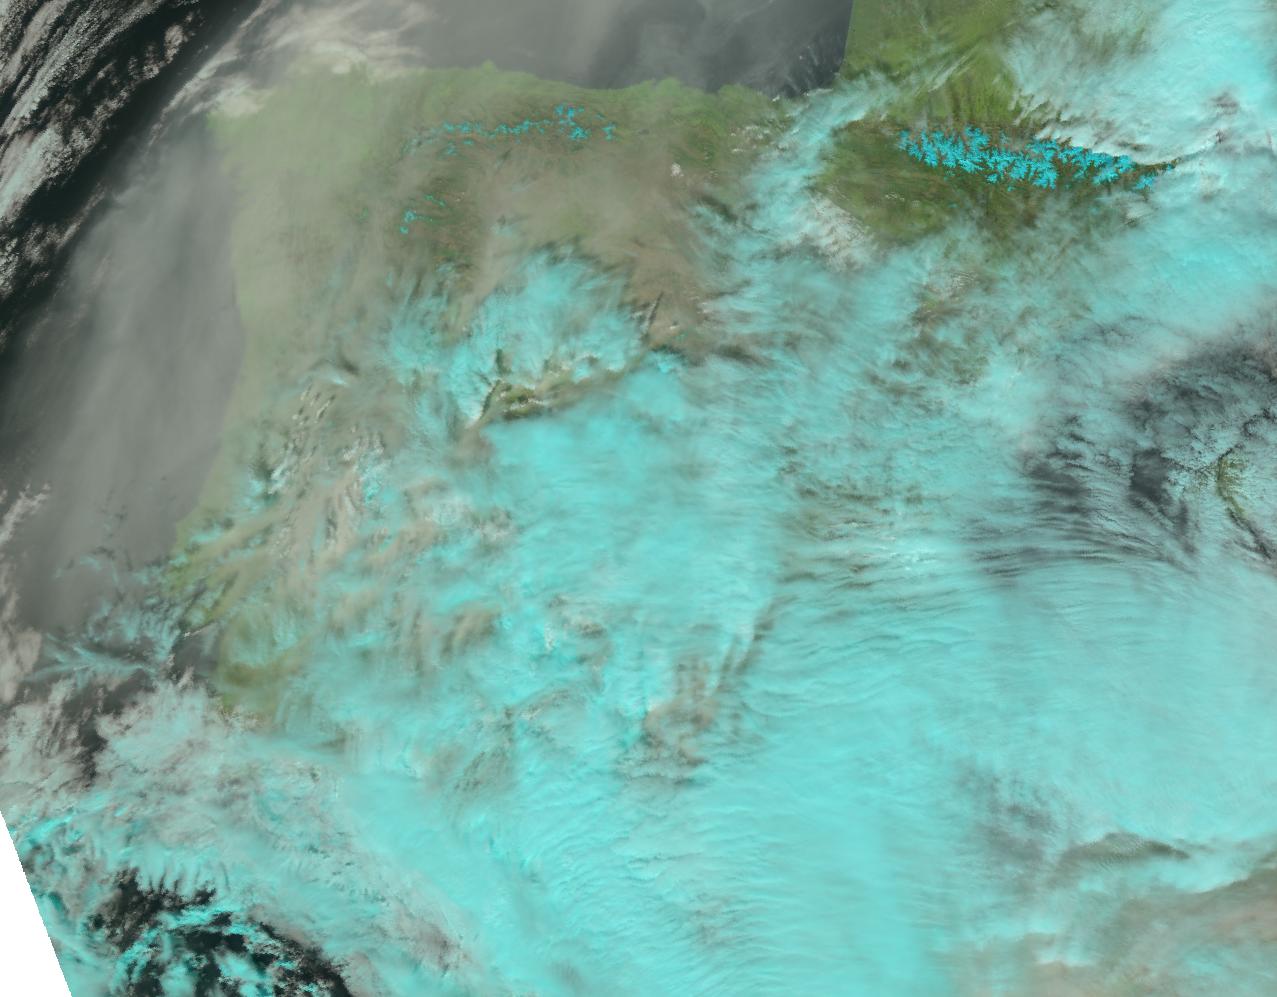

In [12]:
scn_resample_nc.show('natural_color')

SatPy's built-in visualization function is nice, but often you want to make use of additonal features, such as country borders. The library [Cartopy](https://scitools.org.uk/cartopy/docs/latest/) offers powerful functions that enable the visualization of geospatial data in different projections and to add additional features to a plot. Below, we will show you how you can visualize the `natural_color` composite with the two Python packages [matplotlib](https://matplotlib.org/) and [Cartopy](https://scitools.org.uk/cartopy/docs/latest/).

As a first step, we have to convert the `Scene` object into a numpy array. The numpy array additionally needs to be transposed to a shape that can be interpreted by matplotlib's function `imshow()`: (M,N,3). You can convert a Scene object into a `numpy.array` object with the function `np.asarray()`. We have to transpose the array and add index=0 on index position 3.

In [13]:
image = np.asarray(scn_resample_nc['natural_color']).transpose(1,2,0)

<br>

The next step is then to replace all nan values with 0. You can do this with the numpy function `nan_to_num()`. In a subsequent step, we then scale the values to the range between 0 and 1, clipping the lower and upper percentiles so that a potential contrast decrease caused by outliers is eliminated.


In [14]:
image = np.nan_to_num(image)
image = np.interp(image, (np.percentile(image,1), np.percentile(image,99)), (0, 1))

<br>

Let us now also define a variable for the `coordinate reference system`. We take the `area` attribute from she `scn_resample_nc` Scene and convert it with the function `to_cartopy_crs()` into a format Cartopy can read. We will use the `crs` information for plotting.

In [15]:
crs = scn_resample_nc['natural_color'].attrs['area'].to_cartopy_crs()

<br>

Now, we can visualize the `natural_color` composite. The plotting code can be divided in four main parts:
* **Initiate a matplotlib figure**: Initiate a matplotlib plot and define the size of the plot
* **Specify coastlines and a grid**: specify additional features to be added to the plot
* **Plotting function**: plot the numpy array with the plotting function `imshow()`
* **Set plot title**: specify title of the plot

Text(0.5, 1.0, 'Natural color composite around Spain, recorded by VIIRS at 2022-03-15 12:30')

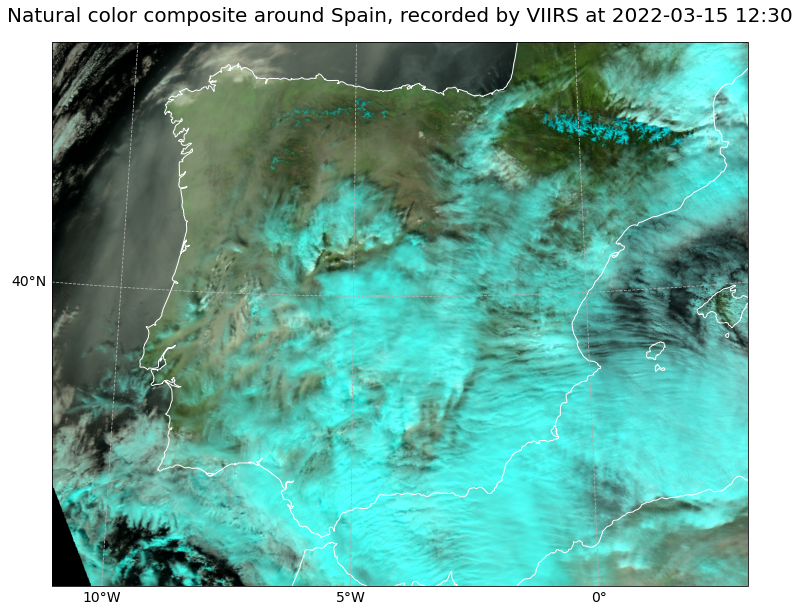

In [16]:
# ... and use it to generate an axes in our figure with the same CRS
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(1, 1, 1, projection=crs)

# Now we can add some coastlines...
ax.coastlines(resolution="10m", color="white")

# ... and a lat/lon grid:
gl = ax.gridlines(draw_labels=True, linestyle='--', xlocs=range(-10,11,5), ylocs=range(30,50,5))
gl.top_labels=False
gl.right_labels=False
gl.xformatter=LONGITUDE_FORMATTER
gl.yformatter=LATITUDE_FORMATTER
gl.xlabel_style={'size':14}
gl.ylabel_style={'size':14}

# In the end, we can plot our image data...
ax.imshow(image, transform=crs, extent=crs.bounds, origin="upper")

# and add a title to our plot
plt.title("Natural color composite around Spain, recorded by VIIRS at " + scn_resample_nc.start_time.strftime("%Y-%m-%d %H:%M"), fontsize=20, pad=20.0)


<hr>

### <a id='msg_seviri'></a>2. Meteosat Second Generation SEVIRI Level 1.5 dust RGB

#### Download the MSG SEVIRI Level 1.5 data

The time stamp for MSG SEVIRI data starts at 13:15 UTC.

After logging in and filtering for the required data file, you can try using the `eumac` library to programmatically download the file. The download code is generated automatically for you. Remember to add a `!` in front in order to execute this code in a Jupyter notebook code cell. The following is an example:

In [17]:
#!eumdac download --collection EO:EUM:DAT:MSG:HRSEVIRI --product MSG4-SEVI-MSG15-0100-NA-20220315132742.207000000Z-NA

#### Load and browse MSG SEVIRI Level 1.5 data

We will use the pre-downloaded files in the eodata folder. You may use the files you downloaded yourself in the same folder as your Jupyter notebook. You have to change the filepath for the folder/directory if this is the case.

We have to unzip the file before we can open it. You can unzip `zip archives` in Python with the Python package `zipfile` and the function `extractall()`. You will see a five new files appearing in the same folder as this notebook. This is just for demonstration purposes.

In [18]:
#import zipfile
#with zipfile.ZipFile('../../eodata/dust/part2/1_satellite/seviri/MSG4-SEVI-MSG15-0100-NA-20220315132742.207000000Z-NA.zip', 'r') as zip_ref:
#    zip_ref.extractall('../../eodata/dust/part2/1_satellite/seviri/')

Let us load one image scence for 15 March 2022 at 13:15 UTC. First, we specify the file path and create a variable with the name `file_name`.

In [19]:
file_name = glob.glob('../../eodata/dust/part2/1_satellite/seviri/*.nat')
file_name

['../../eodata/dust/part2/1_satellite/seviri/MSG4-SEVI-MSG15-0100-NA-20220315132742.207000000Z-NA.nat']

<br>

In a next step, we use the `Scene` constructor from the [satpy](https://satpy.readthedocs.io/en/stable/index.html) library. Once loaded, a `Scene` object represents a single geographic region of data, typically at a single continuous time range.

You have to specify the two keyword arguments `reader` and `filenames` in order to successfully load a scene. As mentioned above, for MSG SEVIRI data in the Native format, you can use the `seviri_l1b_native` reader.

In [20]:
scn2 = Scene(reader="seviri_l1b_native", 
             filenames=file_name)
scn2

A `Scene` object loads all band information of a satellite image. With the function `available_dataset_names()`, you can see the available bands available from the MSG SEVIRI satellite.

In [21]:
scn2.available_dataset_names()

['HRV',
 'IR_016',
 'IR_039',
 'IR_087',
 'IR_097',
 'IR_108',
 'IR_120',
 'IR_134',
 'VIS006',
 'VIS008',
 'WV_062',
 'WV_073']

Let us define a list with the composite ID `dust`. This list (`composite_id`) can then be passed to the function `load()`. Per default, scenes are loaded with the north pole facing downwards. You can specify the keyword argument `upper_right_corner="NE"` in order to turn the image around and have the north pole facing upwards.

In [22]:
composite_id = ['dust']
scn2.load(composite_id, upper_right_corner="NE")

#### Visualise MSG SEVIRI Level 1.5 Data over Spain

We can reuse the area definition file we used earlier, which is saved in the variable called `areadef`.

In [23]:
from pyresample import get_area_def

area_id = 'spain_1km'

x_size = 1277
y_size = 997
area_extent = (-638621.728369, -475160.672876, 638621.728369, 521921.054491)
projection = '+proj=laea +lat_0=39.5 +lon_0=-4.0 +ellps=WGS84'
description = 'Spain'
proj_id = 'laea_39.5_-4.0'

areadef = get_area_def(area_id, description, proj_id, projection,x_size, y_size, area_extent)

Next, you can use the area definition above in order to resample the loaded Scene object. You can use the function `resample()` to do so.

In [24]:
scn2_resample_nc = scn2.resample(areadef)

Afterwards, you can visualize the resampled `dust` RGB with the function `show()`.

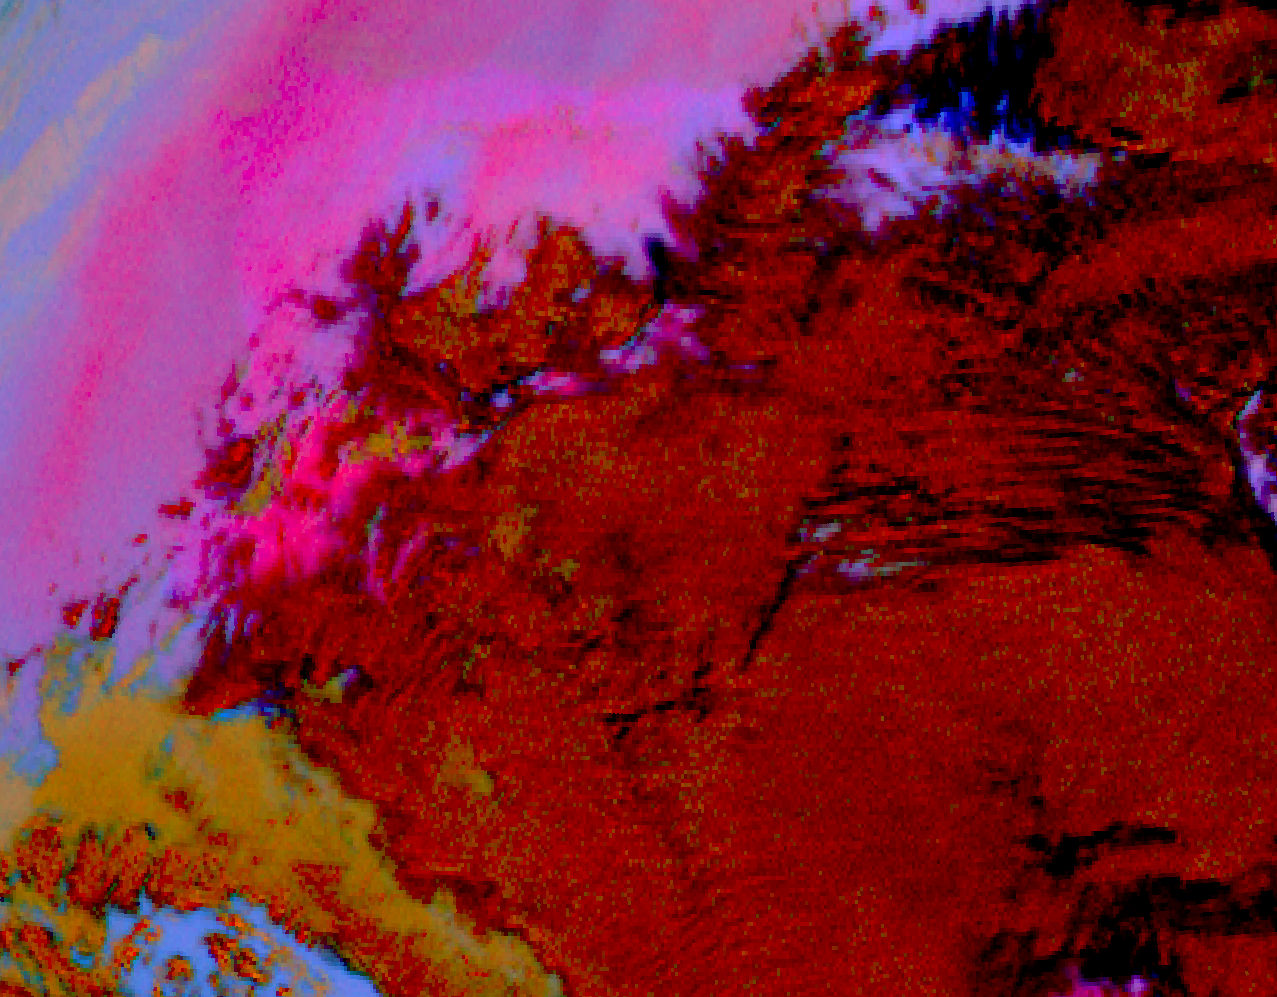

In [25]:
scn2_resample_nc.show('dust')

Here you can see that a layer of cloud (shown in red) is obscuring most of the image. However, a strong dust signal in magenta is visible under the clouds.

<hr>

### <a id='s5p_ai'></a>3. Sentinel-5P TROPOMI Level 2 Aerosol Index

#### Load and browse Sentinel-5P TROPOMI UVAI over Spain

Let us load a Sentinel-5P TROPOMI data file as `xarray.Dataset` from 15 March 2022, time stamp 11:55 to 12:53 UTC and inspect the data structure:

In [26]:
file = xr.open_dataset('../../eodata/dust/part2/1_satellite/sentinel5p/S5P_OFFL_L2__AER_AI_20220315T113349_20220315T131519_22900_02_020301_20220317T012002.nc', group='PRODUCT')
file

<xarray.Dataset>
Dimensions:                          (scanline: 4173, ground_pixel: 450, time: 1, corner: 4)
Coordinates:
  * scanline                         (scanline) float64 0.0 1.0 ... 4.172e+03
  * ground_pixel                     (ground_pixel) float64 0.0 1.0 ... 449.0
  * time                             (time) datetime64[ns] 2022-03-15
  * corner                           (corner) float64 0.0 1.0 2.0 3.0
    latitude                         (time, scanline, ground_pixel) float32 ...
    longitude                        (time, scanline, ground_pixel) float32 ...
Data variables:
    delta_time                       (time, scanline) datetime64[ns] ...
    time_utc                         (time, scanline) object ...
    qa_value                         (time, scanline, ground_pixel) float32 ...
    aerosol_index_354_388            (time, scanline, ground_pixel) float32 ...
    aerosol_index_340_380            (time, scanline, ground_pixel) float32 ...
    aerosol_index_354_388_precision  (time, scanline, ground_pixel) float32 ...
    aerosol_index_340_380_precision  (time, scanline, ground_pixel) float32 ...

You can specify one variable of interest by putting the name of the variable into square brackets `[]` and get more detailed information about the variable. E.g. `aerosol_index_354_388` is the 'Aerosol index from 354 and 388 nm' and has three dimensions, `time`, `scanline` and `ground_pixel` respectively.

In [27]:
ai = file['aerosol_index_354_388']
ai

<xarray.DataArray 'aerosol_index_354_388' (time: 1, scanline: 4173, ground_pixel: 450)>
[1877850 values with dtype=float32]
Coordinates:
  * scanline      (scanline) float64 0.0 1.0 2.0 ... 4.171e+03 4.172e+03
  * ground_pixel  (ground_pixel) float64 0.0 1.0 2.0 3.0 ... 447.0 448.0 449.0
  * time          (time) datetime64[ns] 2022-03-15
    latitude      (time, scanline, ground_pixel) float32 ...
    longitude     (time, scanline, ground_pixel) float32 ...
Attributes:
    units:                   1
    proposed_standard_name:  ultraviolet_aerosol_index
    comment:                 Aerosol index from 388 and 354 nm
    long_name:               Aerosol index from 388 and 354 nm
    radiation_wavelength:    [354. 388.]
    ancillary_variables:     aerosol_index_354_388_precision

You can retrieve the array values of the variable with squared brackets: `[:,:,:]`. One single time step can be selected by specifying one value of the time dimension, e.g. `[0,:,:]`.

In [28]:
ai_1503 = ai[0,:,:]
ai_1503

<xarray.DataArray 'aerosol_index_354_388' (scanline: 4173, ground_pixel: 450)>
[1877850 values with dtype=float32]
Coordinates:
  * scanline      (scanline) float64 0.0 1.0 2.0 ... 4.171e+03 4.172e+03
  * ground_pixel  (ground_pixel) float64 0.0 1.0 2.0 3.0 ... 447.0 448.0 449.0
    time          datetime64[ns] 2022-03-15
    latitude      (scanline, ground_pixel) float32 ...
    longitude     (scanline, ground_pixel) float32 ...
Attributes:
    units:                   1
    proposed_standard_name:  ultraviolet_aerosol_index
    comment:                 Aerosol index from 388 and 354 nm
    long_name:               Aerosol index from 388 and 354 nm
    radiation_wavelength:    [354. 388.]
    ancillary_variables:     aerosol_index_354_388_precision

Additionally, you can save the attributes `units` and `longname`, which you can make use of when visualizing the data.

In [29]:
longname = ai_1503.long_name
units = ai_1503.units

longname, units

('Aerosol index from 388 and 354 nm', '1')

Let us create a geographical subset for continental Spain, in order to better analyse the Saharan dust event which occured in March 2022 over Spain.

For geographical subsetting, you can use the function [generate_geographical_subset](../functions.ipynb#generate_geographical_subset). 

Define the bounding box information for continental Spain.

In [30]:
latmin = 35.
latmax = 44.
lonmin = -11.
lonmax = 3

<br>

Now, let us apply the function [generate_geographical_subset](../../functions.ipynb#generate_geographcial_subset) to subset the `ai_1503` xarray.DataArray. Let us call the new `xarray.DataArray` `ai_1503_subset`.

In [31]:
ai_1503_subset = generate_geographical_subset(xarray=ai_1503, 
                                             latmin=latmin, 
                                             latmax=latmax, 
                                             lonmin=lonmin, 
                                             lonmax=lonmax)
ai_1503_subset

<xarray.DataArray 'aerosol_index_354_388' (scanline: 258, ground_pixel: 186)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * scanline      (scanline) float64 2.801e+03 2.802e+03 ... 3.057e+03 3.058e+03
  * ground_pixel  (ground_pixel) float64 0.0 1.0 2.0 3.0 ... 183.0 184.0 185.0
    time          datetime64[ns] 2022-03-15
    latitude      (scanline, ground_pixel) float32 31.3 31.34 ... 48.33 48.34
    longitude     (scanline, ground_pixel) float32 -6.056 -5.971 ... 1.003 1.051
Attributes:
    units:                   1
    proposed_standard_name:  ultraviolet_aerosol_index
    comment:                 Aerosol index from 388 and 354 nm
    long_name:               Aerosol index from 388 and 354 nm
    radiation_wavelength:    [354. 388.]
    ancillary_variables:     aerosol_index_354_388_precision

#### Visualise Sentinel-5P TROPOMI UVAI over Spain

The next step is to visualize the dataset. You can use the function [visualize_pcolormesh](../functions.ipynb#visualize_pcolormesh), which makes use of matploblib's function `pcolormesh` and the [Cartopy](https://scitools.org.uk/cartopy/docs/latest/) library.

You can make use of the variables we have defined above:
- `units`
- `long_name`
- `latitude`
- `longitude`

Additionally, you can specify the color scale and minimum and maxium data values.

Let us visualize the subsetted `xarray.DataArray`, setting the `set_global` kwarg to `False` and you specify the longitude and latitude bounds specified above.

Additionally, in order to have the time information as part of the title, we add the string of the datetime information to the `longname` variable: `longname + ' ' + str(ai_1503.time.data)[0:10]`.

(<Figure size 1440x720 with 2 Axes>,
 <GeoAxesSubplot:title={'center':'Aerosol index from 388 and 354 nm 2022-03-15'}>)

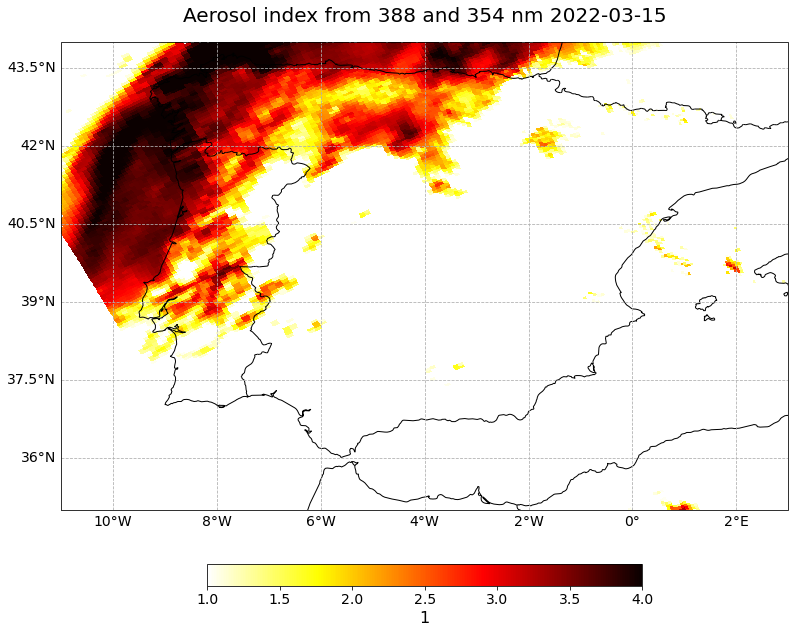

In [32]:
visualize_pcolormesh(data_array=ai_1503_subset,
                     longitude=ai_1503_subset.longitude,
                     latitude=ai_1503_subset.latitude,
                     projection=ccrs.PlateCarree(),
                     color_scale='hot_r',
                     unit=units,
                     long_name=longname + ' ' + str(ai_1503_subset.time.data)[0:10],
                     vmin=1, 
                     vmax=4,
                     lonmin=lonmin,
                     lonmax=lonmax,
                     latmin=latmin,
                     latmax=latmax,
                     set_global=False)

<br>

<hr>

<img src='../img/copernicus_logo.png' alt='Logo EU Copernicus' align='left' width='20%'><br><br><br><br>
This project is licensed under <a href="../../LICENSE">GNU General Public License v3.0 only</a> and is developed under a Copernicus contract.

<p style="text-align:right;"> <a href='https://training.eumetsat.int'>EUMETSAT Training</a> | <a href='mailto:training@eumetsat.int'>Contact the training team</a></p>